In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('Facebook_Live.csv')
df.head(5) #display first 5 rows

status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  
2          1         0           0  
3          0         0           0  
4          0         0           0

In [3]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 7046 rows , 12 columns.


In [4]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [5]:
print(f'Data contains {df.duplicated().sum()} duplicated rows')

Data contains 51 duplicated rows


In [6]:
duplicated_rows = df[df.duplicated()]

print("Indexes of duplicated rows:",duplicated_rows.index)

Indexes of duplicated rows: Index([6217, 6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225, 6226, 6227, 6228,
       6229, 6230, 6231, 6232, 6233, 6234, 6235, 6236, 6237, 6238, 6239, 6240,
       6241, 6242, 6243, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252,
       6253, 6254, 6255, 6256, 6257, 6258, 6259, 6260, 6261, 6262, 6263, 6264,
       6265, 6266, 6267],
      dtype='int64')


In [7]:
df.drop_duplicates(inplace=True)
df.head()

status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  
2          1         0           0  
3          0         0           0  
4          0         0           0

In [8]:
print(f'Data after droping duplicated rows has {df.shape[0]} rows , {df.shape[1]} columns.')

Data after droping duplicated rows has 6995 rows , 12 columns.


In [9]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [12]:
import plotly.express as px

# Assuming status_counts is already defined as per your initial code
status_counts = df['status_type'].value_counts()
print(status_counts)

fig = px.bar(
    x=status_counts.index, 
    y=status_counts.values, 
    labels={'x': 'Status Type', 'y': 'Count'}, 
    title='Distribution of Status Types', 
    text=status_counts.values
)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
fig.update_traces(marker_color=colors)

fig.update_traces(textposition='outside')
fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    plot_bgcolor='#D2B48C'
)

fig.show()

status_type
photo     4242
video     2331
status     359
link        63
Name: count, dtype: int64


In [13]:
df['status_published'] = pd.to_datetime(df['status_published']) 

df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day

In [14]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'year', 'month', 'day'],
      dtype='object')

In [15]:
import plotly.express as px

# Assuming df is already defined and contains the 'year' column
year_counts = df['year'].value_counts()

print(year_counts)


colors = ['#FF6347', '#FFD700', '#ADFF2F', '#40E0D0', '#1E90FF', '#BA55D3', '#FF69B4']

fig = px.pie(
    year_counts, 
    values=year_counts.values, 
    names=year_counts.index, 
    title='Distribution of Posts by Year',
    color_discrete_sequence=colors
)

fig.update_layout(
    title_font_size=16,
    title_x=0.5
)

explode = [0.15 if index == 2018 else 0 for index in year_counts.index]
fig.update_traces(pull=explode)

fig.show()

year
2018    2495
2017    2253
2012     589
2016     588
2013     500
2015     337
2014     233
Name: count, dtype: int64


In [16]:
import plotly.express as px

# Assuming df is already defined and contains the 'year' and 'status_type' columns
year_status_type_counts = df.groupby(['year', 'status_type']).size().reset_index(name='count')

print(year_status_type_counts)


colors = {
    'photo': '#FF6347',    # Tomato
    'status': '#FFD700',   # Gold
    'video': '#ADFF2F',    # GreenYellow
    'link': '#40E0D0'      # Turquoise
}

fig = px.bar(year_status_type_counts, 
             x='year', 
             y='count', 
             color='status_type', 
             title='Distribution of Posts by Year and Status Type', 
             labels={'count': 'Count', 'year': 'Year', 'status_type': 'Status Type'},
             color_discrete_map=colors)

fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    plot_bgcolor='#D2B48C'
)

fig.show()

    year status_type  count
0   2012       photo    589
1   2013       photo    404
2   2013      status      2
3   2013       video     94
4   2014        link      1
5   2014       photo     25
6   2014       video    207
7   2015        link     14
8   2015       photo    202
9   2015      status     79
10  2015       video     42
11  2016        link     14
12  2016       photo    403
13  2016      status     51
14  2016       video    120
15  2017        link     18
16  2017       photo   1269
17  2017      status    122
18  2017       video    844
19  2018        link     16
20  2018       photo   1350
21  2018      status    105
22  2018       video   1024


In [17]:
import plotly.express as px

# Assuming df is already defined and contains the 'month' column
counts = df['month'].value_counts()
print(counts)

fig = px.bar(x=counts.index, y=counts.values, labels={'x':'Month', 'y':'Count'}, 
             title='Distribution of Posts by Month', text=counts.values)


colors = ['#1E90FF', '#FF6347', '#FFD700', '#ADFF2F', '#40E0D0', '#BA55D3', '#FF69B4', '#FFA07A', '#8A2BE2', '#7FFF00', '#DC143C', '#00FA9A']

fig.update_traces(marker_color=colors, textposition='outside')

fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    plot_bgcolor='#F5DEB3',
)

fig.show()

month
12    823
5     719
11    674
3     654
4     612
6     598
1     585
2     513
8     499
9     486
10    485
7     347
Name: count, dtype: int64


In [18]:
df['day'].value_counts()

day
8     279
25    267
24    261
20    260
9     259
5     258
22    243
10    242
23    240
26    239
21    237
18    236
11    233
2     230
27    229
19    228
6     227
16    226
12    224
15    223
28    220
7     218
3     214
17    213
29    211
1     206
13    204
4     199
30    179
14    169
31    121
Name: count, dtype: int64

In [19]:
print('Day' ,df['day'].value_counts().index.min(),' contains the least number of posts')
print('Day' ,df['day'].value_counts().index.max(),'contains the lagest number of posts')

Day 1  contains the least number of posts
Day 31 contains the lagest number of posts


In [20]:
df[['status_id', 'status_type', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']].describe()

num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    6995.000000   6995.000000  6995.000000  6995.000000  6995.000000   
mean      224.955826    225.527091    40.263617   209.917655    12.743102   
std       452.996708    892.974249   132.082313   439.668236    40.111560   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        58.000000      4.000000     0.000000    56.000000     0.000000   
75%       216.000000     22.000000     4.000000   182.000000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  6995.000000  6995.000000  6995.000000  6995.000000  
mean      1.252037     0.697927     0.232738     0.109650  
std       8.727393     3.971998     1.481518     0.687827  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000  
max     278.000000   157.000000    51.000000    31.000000

In [21]:
df[['num_comments','num_shares','num_likes','num_loves','num_wows',
       'num_hahas', 'num_sads', 'num_angrys']].describe()

num_comments   num_shares    num_likes    num_loves     num_wows  \
count   6995.000000  6995.000000  6995.000000  6995.000000  6995.000000   
mean     225.527091    40.263617   209.917655    12.743102     1.252037   
std      892.974249   132.082313   439.668236    40.111560     8.727393   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000    17.000000     0.000000     0.000000   
50%        4.000000     0.000000    56.000000     0.000000     0.000000   
75%       22.000000     4.000000   182.000000     3.000000     0.000000   
max    20990.000000  3424.000000  4710.000000   657.000000   278.000000   

         num_hahas     num_sads   num_angrys  
count  6995.000000  6995.000000  6995.000000  
mean      0.697927     0.232738     0.109650  
std       3.971998     1.481518     0.687827  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max     157.000000    51.000000    31.000000

In [22]:
import plotly.graph_objects as go

# Assuming df is already defined and contains the numerical columns
numerical_stats = df[['num_comments','num_shares','num_likes','num_loves','num_wows',
                      'num_hahas', 'num_sads', 'num_angrys']].describe()

numerical_cols = ['num_comments','num_shares','num_likes','num_loves','num_wows',
                  'num_hahas', 'num_sads', 'num_angrys']


colors = ['#1E90FF', '#FF6347', '#FFD700', '#ADFF2F', '#40E0D0', '#BA55D3', '#FF69B4', '#FFA07A']

fig = go.Figure()

for i, col in enumerate(numerical_cols):
    fig.add_trace(go.Box(y=df[col], name=col, boxpoints='all', marker_color=colors[i]))

fig.update_layout(title='Boxplot of Numerical Columns',
                  xaxis=dict(title='Numerical Columns'),
                  yaxis=dict(title='Values'),
                  xaxis_tickangle=-45,
                  title_font_size=16,
                  title_x=0.5,
                  plot_bgcolor='#F5DEB3')

fig.update_yaxes(range=[0, 10000])

fig.show()

In [23]:
import plotly.express as px

# Assuming df is already defined and contains the columns 'num_comments', 'num_shares', and 'num_reactions'
corr = df['num_comments'].corr(df['num_shares'])


color_scale = px.colors.sequential.Plasma

fig = px.scatter(df, x='num_comments', y='num_shares', color='num_reactions',
                 title=f'Correlation between Number of Comments and Number of Shares: {round(corr, 2)}',
                 labels={'num_reactions': 'Number of Reactions', 
                         'num_comments': 'Number of Comments',
                         'num_shares': 'Number of Shares'},
                 opacity=0.5,
                 color_continuous_scale=color_scale)

fig.update_layout(
    title_font_size=16,
    title_x=0.5
)

fig.show()

In [24]:
df.drop(columns=['status_id','status_published'],inplace=True)
df

status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
7041       photo             89             0           0         89   
7042       photo             16             0           0         14   
7043       photo              2             0           0          1   
7044       photo            351            12          22        349   
7045       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  year  month  day  
0            92         3          1         1           0  2018      4   22  
1             0         0          0         0           0  2018      4   21  
2            21         1          1         0           0  2018      4   21  
3             0         0          0         0           0  2018      4   21  
4             9         0          0         0           0  2018      4   18  
...         ...       ...        ...       ...         ...   ...    ...  ...  
7041          0         0          0         0           0  2016      9   24  
7042          1         0          1         0           0  2016      9   23  
7043          1         0          0         0           0  2016      9   21  
7044          2         0          0         0           0  2016      9   20  
7045          0         0          0         0           0  2016      9   10  

[6995 rows x 13 columns]

In [25]:
mapping = {'video': 0, 'photo': 1, 'link': 2, 'status': 3}

df['status_type'] = df['status_type'].map(mapping)
df['status_type']

0       0
1       1
2       0
3       1
4       1
       ..
7041    1
7042    1
7043    1
7044    1
7045    1
Name: status_type, Length: 6995, dtype: int64

In [26]:
df.head(2)

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0            0            529           512         262        432         92   
1            1            150             0           0        150          0   

   num_wows  num_hahas  num_sads  num_angrys  year  month  day  
0         3          1         1           0  2018      4   22  
1         0          0         0           0  2018      4   21

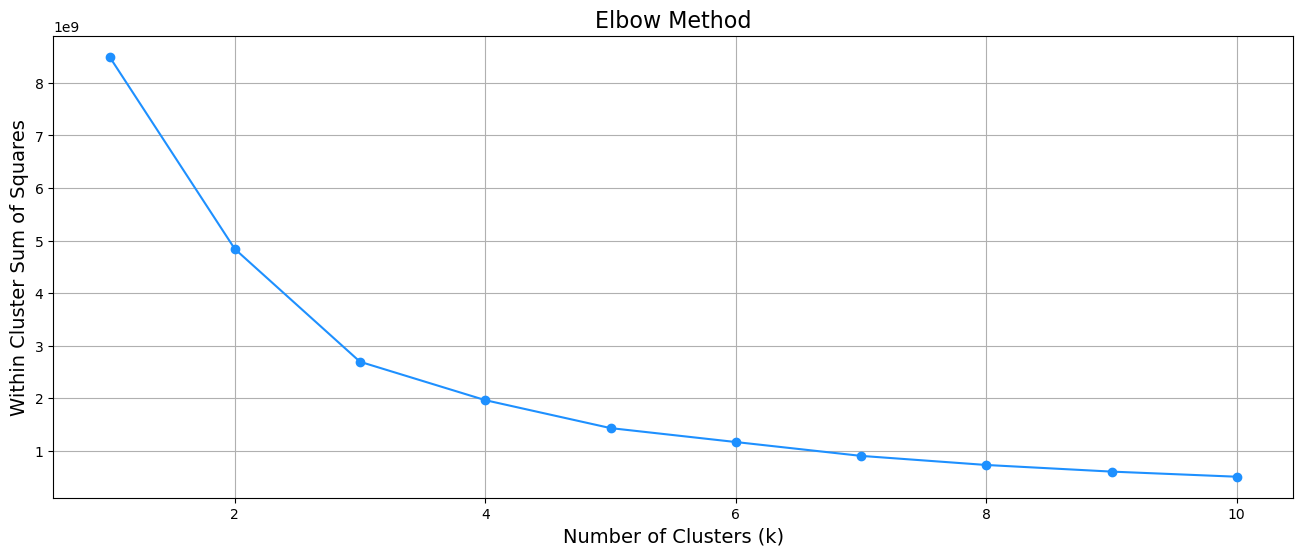

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the data to be clustered
wcss = []  # Within Cluster Sum of Squares
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(16, 6))


plt.plot(k_values, wcss, marker='o', color='#1E90FF')  # DodgerBlue

plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Within Cluster Sum of Squares', fontsize=14)
plt.grid(True)
plt.show()

In [33]:
import numpy as np
import pandas as pd

def init_centroids(data, k):
    # Randomly select k data points as initial centroids
    centroids_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_indices]
    return centroids

# Assuming df is already defined as a pandas DataFrame
df = pd.DataFrame(df)
centroids = init_centroids(df.values, 4)  # Renaming the variable to avoid conflict

colors = ['\033[91m', '\033[92m', '\033[93m', '\033[94m']  # Red, Green, Yellow, Blue
reset_color = '\033[0m'

for n, centroid in enumerate(centroids, start=1):
    print(f'{colors[n % len(colors)]}Center of cluster {n}: {centroid}{reset_color}')

# Checking the shape of the centroids array
print('Centroids shape:', centroids.shape)

Center of cluster 1: [   0 1166  878  254  825  320    8    9    3    1 2018    4   25]
Center of cluster 2: [   1  100    4    0   94    3    3    0    0    0 2017    8   26]
Center of cluster 3: [   0  180  120    0  145   33    0    2    0    0 2016    8    1]
Center of cluster 4: [   1   38    9    0   38    0    0    0    0    0 2013    1   31]
Centroids shape: (4, 13)


In [34]:
import numpy as np
import pandas as pd

def init_centroids(data, k):
    # Randomly select k data points as initial centroids
    centroids_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_indices]
    return centroids

def closest_centroid(data_point, centroids):
    distances = np.linalg.norm(centroids - data_point, axis=1)  # Euclidean distance
    cls_idx = np.argmin(distances)
    return cls_idx

# Assuming df is already defined as a pandas DataFrame
df = pd.DataFrame(df)
centroids = init_centroids(df.values, 4)

colors = ['\033[91m', '\033[92m', '\033[93m', '\033[94m']  # Red, Green, Yellow, Blue
reset_color = '\033[0m'

for i, data_point in enumerate(df.values):
    if i == 10:
        break
    cls_idx = closest_centroid(data_point, centroids)
    print(f'{colors[cls_idx % len(colors)]}Data point {i+1} is closest to centroid {cls_idx+1}{reset_color}')

Data point 1 is closest to centroid 3
Data point 2 is closest to centroid 4
Data point 3 is closest to centroid 1
Data point 4 is closest to centroid 4
Data point 5 is closest to centroid 1
Data point 6 is closest to centroid 1
Data point 7 is closest to centroid 1
Data point 8 is closest to centroid 1
Data point 9 is closest to centroid 3
Data point 10 is closest to centroid 1


In [35]:
from sklearn.cluster import KMeans
import plotly.express as px
from tqdm import tqdm

def run_kmeans(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return cluster_labels, centroids 

for x in tqdm(range(15)):
    cluster_labels, centroids = run_kmeans(df[['num_reactions', 'num_comments']], 4)
    
    fig = px.scatter(df, x='num_reactions', y='num_comments', color=cluster_labels.astype(str), 
                     title=f'K-means Clustering (Iteration {x+1})', 
                     labels={'num_reactions': 'Number of Reactions', 'num_comments': 'Number of Comments'},
                     color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.7)
    
    fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(color='black', size=10), name='Centroids')
    
    fig.update_layout(title_font_size=16, title_x=0.5)
  
    for i in range(len(fig.data)-1):
        fig.data[i].name = f'Cluster {i+1}'
    
    fig.show()

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



  7%|█████▌                                                                             | 1/15 [00:00<00:08,  1.66it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 13%|███████████                                                                        | 2/15 [00:01<00:08,  1.58it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 20%|████████████████▌                                                                  | 3/15 [00:01<00:07,  1.54it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 27%|██████████████████████▏                                                            | 4/15 [00:02<00:07,  1.49it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 33%|███████████████████████████▋                                                       | 5/15 [00:03<00:06,  1.58it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 40%|█████████████████████████████████▏                                                 | 6/15 [00:03<00:05,  1.61it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 47%|██████████████████████████████████████▋                                            | 7/15 [00:04<00:05,  1.45it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 53%|████████████████████████████████████████████▎                                      | 8/15 [00:05<00:04,  1.44it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:05<00:04,  1.47it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:06<00:03,  1.52it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:07<00:03,  1.23it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:08<00:02,  1.16it/s]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:10<00:02,  1.09s/it]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:12<00:01,  1.33s/it]C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:13<00:00,  1.13it/s]


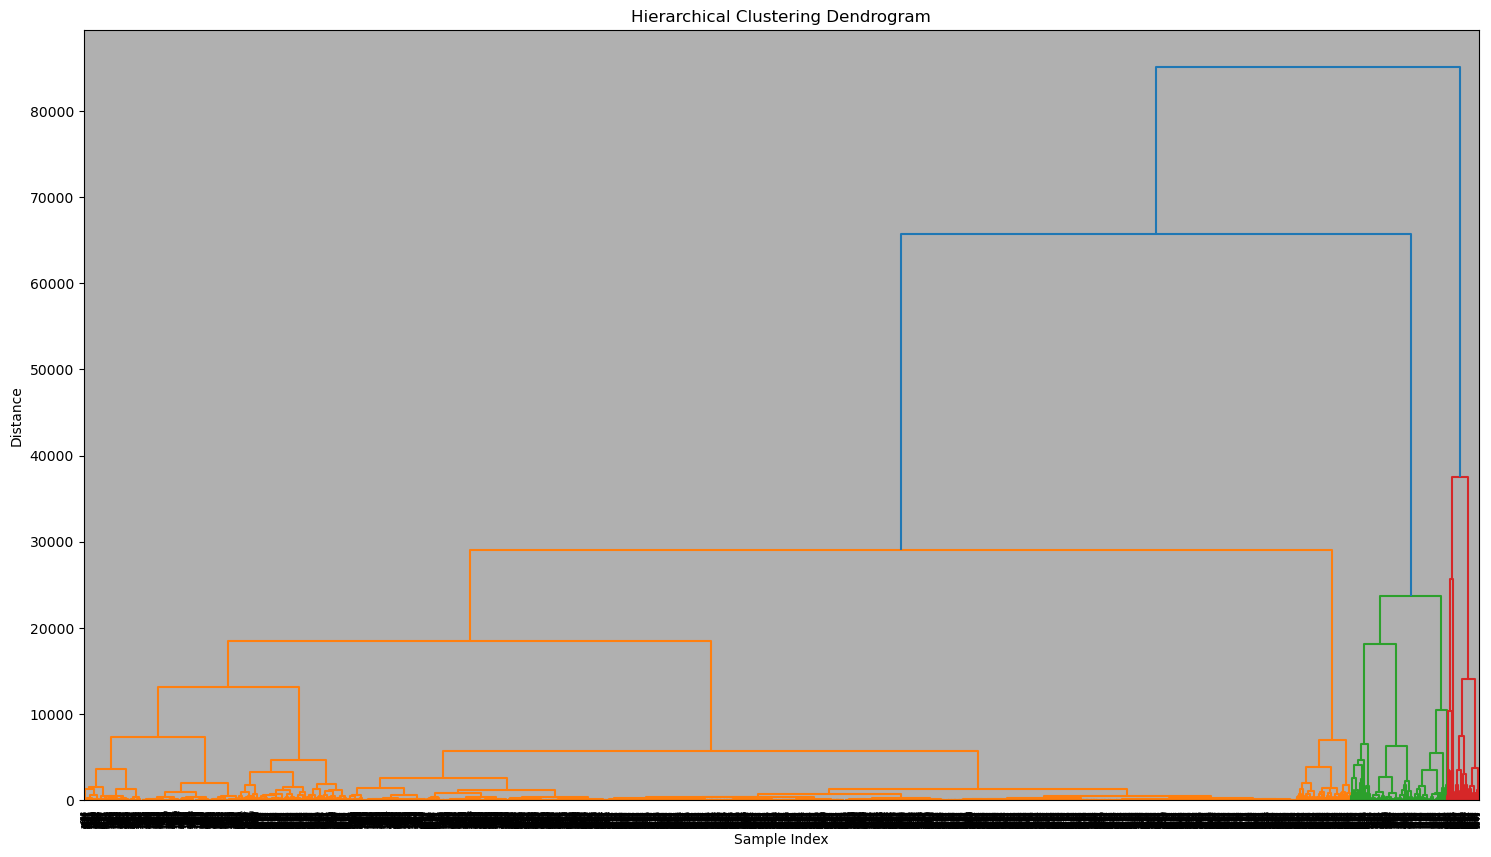

In [36]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

n_clusters = 4  
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = model.fit_predict(df)

linked = linkage(df, method='ward')

plt.figure(figsize=(18, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better readability
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

# Assuming cluster_labels are already computed
silhouette_avg = silhouette_score(df, cluster_labels)

print("Silhouette Score for Hierarchical Clustering:", round(silhouette_avg * 100, 2), '%')

Silhouette Score for Hierarchical Clustering: 81.4 %


In [38]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df and cluster_labels are already defined

df['cluster'] = cluster_labels  # Add clustering column

numerical_cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 
                  'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

data_for_pca = df[numerical_cols]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df = pd.concat([df, pca_df], axis=1)

fig = px.scatter(pca_df, x='PC1', y='PC2', color='cluster',
                 title='PCA Visualization',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 opacity=0.7,
                 color_continuous_scale='Viridis')  

fig.update_layout(
    title_font_size=16,
    title_x=0.5
)

fig.show()

In [39]:
print("\nInterpretation of Principal Components:\n")
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}:")
    print(pd.Series(component, index=numerical_cols).sort_values(ascending=False))
    print()


Interpretation of Principal Components:

Principal Component 1:
num_loves        0.466936
num_shares       0.447115
num_comments     0.348715
num_hahas        0.318231
num_wows         0.309134
num_reactions    0.308031
num_likes        0.264748
num_angrys       0.257340
num_sads         0.180062
dtype: float64

Principal Component 2:
num_likes        0.654631
num_reactions    0.618211
num_wows        -0.000844
num_sads        -0.137762
num_angrys      -0.137829
num_hahas       -0.148811
num_loves       -0.171419
num_shares      -0.207403
num_comments    -0.238228
dtype: float64



## Wishing you all the best on your journey! 🌟🍀

## MoHamed El-sadek 